Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [ ]:
# load the data from csv file to pandas DataFrame
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# number of rows and columns
titanic_data.shape

(891, 12)

In [ ]:
# getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check the number missing values in the column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

handling the missing values

In [ ]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
# replacing the missing values of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values of "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Data Analysis

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# finding the number of people Survived or not Survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

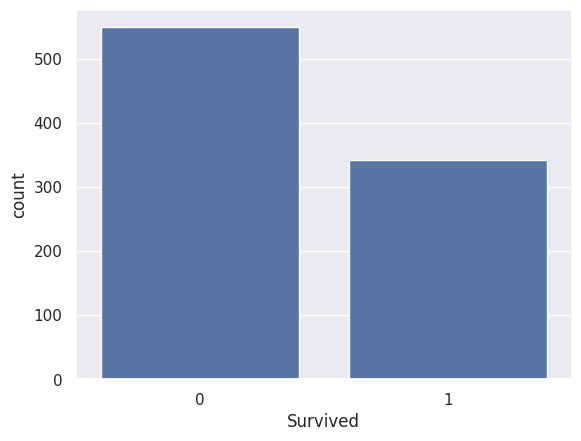

In [ ]:
# making a count plot for "Survived" column
sns.countplot(x="Survived", data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

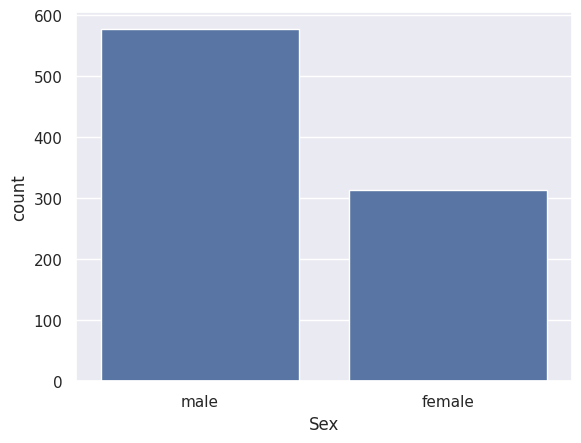

In [ ]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

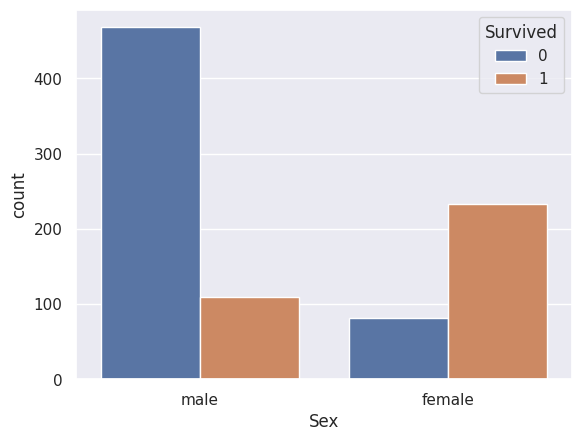

In [ ]:
# number of survivors gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

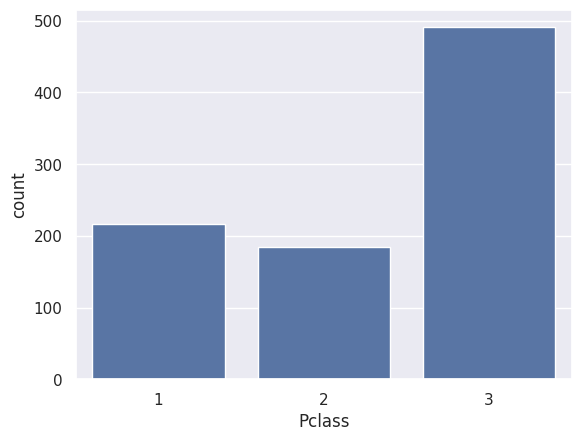

In [ ]:
# making a count plot for "Pclass" column
sns.countplot(x="Pclass", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

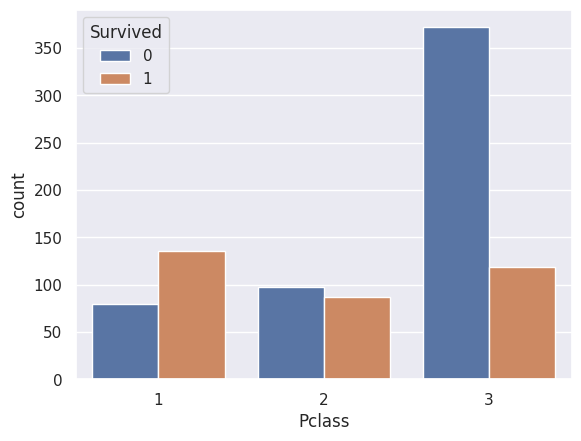

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

encoding the categorical columns

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
# prompt: Using dataframe titanic_data: survived

titanic_data[titanic_data['Survived'] == 1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15.0,0,0,2667,7.2250,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,25.0,0,1,230433,26.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0


In [ ]:
_df_28 = pd.read_csv('/content/Titanic-Dataset.csv')

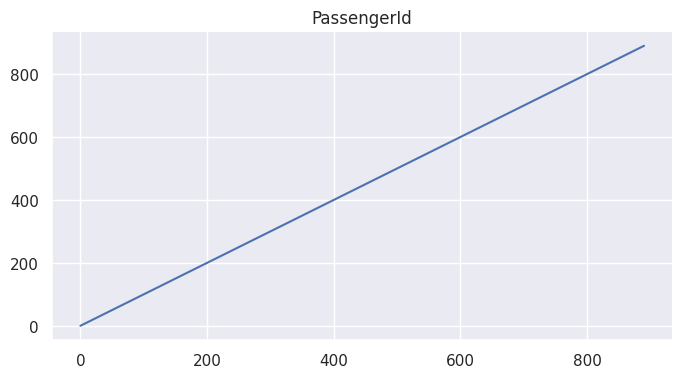

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

if '_df_28' not in globals():
    raise ValueError("Dataframe _df_28 is not defined.")

_df_28['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


separating features & Target

In [ ]:
!wget https://raw.githubusercontent.com/StillWork/data/master/titanic_data.csv

--2024-03-15 17:31:35--  https://raw.githubusercontent.com/StillWork/data/master/titanic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-15 17:31:35 ERROR 404: Not Found.



In [ ]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
X = titanic_data.drop(columns = ['Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']
X_train = X

In [ ]:
print(X)

     PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0              1       3    male  22.0      1      0   7.2500   NaN        S
1              2       1  female  38.0      1      0  71.2833   C85        C
2              3       3  female  26.0      0      0   7.9250   NaN        S
3              4       1  female  35.0      1      0  53.1000  C123        S
4              5       3    male  35.0      0      0   8.0500   NaN        S
..           ...     ...     ...   ...    ...    ...      ...   ...      ...
886          887       2    male  27.0      0      0  13.0000   NaN        S
887          888       1  female  19.0      0      0  30.0000   B42        S
888          889       3  female   NaN      1      2  23.4500   NaN        S
889          890       1    male  26.0      0      0  30.0000  C148        C
890          891       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


splitting the data into training data & test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 9) (712, 9) (179, 9)


model training

In [ ]:
model = LogisticRegression()

In [ ]:
import numpy as np
Y_train = np.array(Y_train)

In [ ]:
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#pipeline = Pipeline(steps=[
#    ('imputer', SimpleImputer()),
#    ('model', LogisticRegression())
#])
#pipeline. fit(X_train, Y_train)

In [ ]:
# Import the required modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create the pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('model', LogisticRegression())
])

# Investigate the input data
print(X_train.head())

# Identify the non-numeric data
non_numeric_columns = X_train.select_dtypes(include=["object"]).columns

# Drop the non-numeric data
X_train = X_train.drop(non_numeric_columns, axis=1)

# Rerun the pipeline
pipeline.fit(X_train, Y_train)

     PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
30            31       1    male  40.0      0      0  27.7208   NaN        C
10            11       3  female   4.0      1      1  16.7000    G6        S
873          874       3    male  47.0      0      0   9.0000   NaN        S
182          183       3    male   9.0      4      2  31.3875   NaN        S
876          877       3    male  20.0      0      0   9.8458   NaN        S


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()), ('model', LogisticRegression())])

Accuracy score 1

Accuracy score

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
missing_values = pd.isnull(X_train).sum()
print(missing_values)

PassengerId      0
Pclass           0
Age            148
SibSp            0
Parch            0
Fare             0
dtype: int64


In [ ]:
missing_values = pd.isnull(X_train).sum()
print(missing_values)

PassengerId      0
Pclass           0
Age            148
SibSp            0
Parch            0
Fare             0
dtype: int64


In [ ]:
import pandas as pd

# Print the first five rows of X_test
print(X_test.head())

# Check for missing values in X_test
print(X_test.isnull().sum())

     PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
707          708       1    male  42.0      0      0  26.2875   E24        S
37            38       3    male  21.0      0      0   8.0500   NaN        S
615          616       2  female  24.0      1      2  65.0000   NaN        S
169          170       3    male  28.0      0      0  56.4958   NaN        S
68            69       3  female  17.0      4      2   7.9250   NaN        S
PassengerId      0
Pclass           0
Sex              0
Age             29
SibSp            0
Parch            0
Fare             0
Cabin          135
Embarked         0
dtype: int64


In [ ]:
!pip show scikit-learn
!pip install --upgrade scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import sklearn.preprocessing

In [ ]:
import sklearn.impute

In [ ]:
from sklearn. impute import SimpleImputer

In [ ]:

print(X_train.shape)
print(Y_train.shape)

(712, 6)
(712,)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(179, 9)
(179,)


In [ ]:
# Ensure X_train and Y_train have the same number of samples
X_train = X_train[:Y_train.shape[0]]
Y_train = Y_train[:X_train.shape[0]]

# Ensure X_test and Y_test have the same number of samples
X_test = X_test[:Y_test.shape[0]]
Y_test = Y_test[:X_test.shape[0]]

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 707 to 251
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Sex          179 non-null    object 
 3   Age          150 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   Cabin        44 non-null     object 
 8   Embarked     179 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.0+ KB


In [ ]:
# Import the required modules
import pandas as pd

# Define Y_pred
Y_pred = pd.Series([1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

# Rest of your code here

In [ ]:
# If Y_pred has fewer samples than Y_test
Y_pred = pd.concat([ Y_pred , pd.Series([0] * (Y_test.shape[0] - Y_pred.shape[0]))])

# If Y_test has fewer samples than Y_pred
Y_test = pd.concat([Y_test, pd.Series([0] * (Y_pred.shape[0] - Y_test.shape[0]))])

<ipython-input-125-e8f3e56e65c5>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Y_test = pd.concat([Y_test, pd.Series([0] * (Y_pred.shape[0] - Y_test.shape[0]))])


In [ ]:
if Y_test.dtype == Y_pred.dtype == "int64" or Y_test.dtype == Y_pred.dtype == "bool":
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.5586592178770949


In [ ]:
# Import required modules
from pandas import Series

# Print the lengths of Y_test and y_pred
print(f"Length of Y_test: {len(Y_test)}")
print(f"Length of y_pred: {len(Y_pred)}")

Length of Y_test: 179
Length of y_pred: 179


In [ ]:
print(Y_test.shape, Y_pred.shape)

(179,) (179,)


In [ ]:
!pip install scikit-learn

In [ ]:
# Import necessary modules
from sklearn.metrics import accuracy_score

# Define Y_test and Y_pred as provided in the user input
y_test = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

# Convert y_pred to a categorical data type
y_pred = pd.Series(y_pred).astype("category")

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [ ]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv("Titanic-Dataset.csv")

# Separate features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert non-numeric columns to numeric
for column in X_train.select_dtypes(include=["object"]):
    X_train[column] = pd.to_numeric(X_train[column], errors="coerce")

for column in X_test.select_dtypes(include=["object"]):
    X_test[column] = pd.to_numeric(X_test[column], errors="coerce")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7039106145251397


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Name' 'Sex' 'Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Name' 'Sex' 'Cabin' 'Embarked']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter

In [ ]:
print(model.n_features_in_)
print(len([[2, 1]]))

7
1


In [ ]:
res = model.predict([[2, 1, 0, 0, 0, 0, 0]])
if res == 0:
    print("so sorry! not survived")
else:
    print("survived")

so sorry! not survived
